# EXPLORATORY DATA ANALYSIS (EDA)

### Bussiness Questions
#### What can we learn about different hosts and areas?
#### What can we learn from predictions? (ex: locations, prices, reviews, etc)
#### Which hosts are the busiest and why?
#### Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\MSc Project\Myproject\Proj_ideas\airbnb\data\listingss.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


In [5]:
df.shape # There are total 18 columns and 69351 observations

(69351, 18)

Text(0.5, 1.0, 'Heatmap for Outliers')

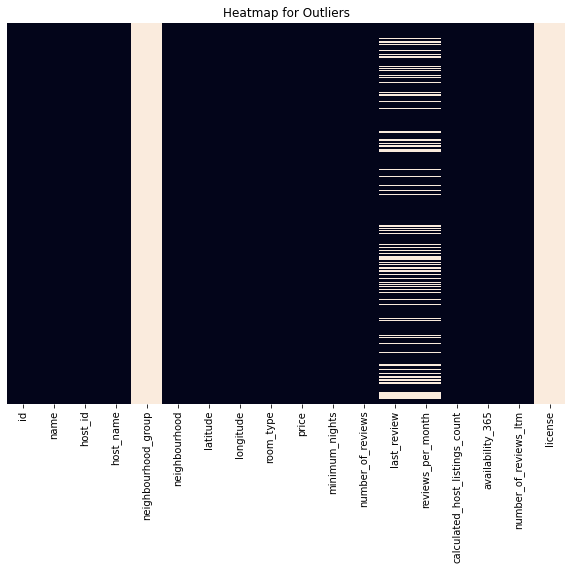

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)
plt.title("Heatmap for Outliers")

In [7]:
round((df.isnull().sum()/df.shape[0])*100,2)

id                                  0.00
name                                0.03
host_id                             0.00
host_name                           0.01
neighbourhood_group               100.00
neighbourhood                       0.00
latitude                            0.00
longitude                           0.00
room_type                           0.00
price                               0.00
minimum_nights                      0.00
number_of_reviews                   0.00
last_review                        24.20
reviews_per_month                  24.20
calculated_host_listings_count      0.00
availability_365                    0.00
number_of_reviews_ltm               0.00
license                           100.00
dtype: float64

#### "neighbourhood_group" and "license" are completely fillled with null values. So, we can remove them.               

In [153]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935100e+04,6.935100e+04,0.0,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000,69351.000000,69351.000000,69351.000000,0.0
mean,1.373703e+17,1.242124e+08,NaN,51.509544,-0.128489,177.208822,5.997505,17.537051,0.882593,11.987498,108.520266,4.734438,NaN
std,2.651479e+17,1.377104e+08,NaN,0.049182,0.100957,412.823024,25.709514,40.410763,1.274510,37.148839,132.821088,12.032502,NaN
min,1.391300e+04,4.775000e+03,NaN,51.272480,-0.523600,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810090e+07,1.870718e+07,NaN,51.483140,-0.189520,55.000000,1.000000,1.000000,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395467e+07,6.010350e+07,NaN,51.513600,-0.126200,100.000000,2.000000,4.000000,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.265645e+07,1.960405e+08,NaN,51.539710,-0.068550,180.000000,4.000000,16.000000,1.080000,4.000000,228.000000,5.000000,NaN
max,7.123951e+17,4.788540e+08,NaN,51.708930,0.305150,25000.000000,1125.000000,1141.000000,51.330000,285.000000,365.000000,660.000000,NaN


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              69351 non-null  int64         
 1   name                            69330 non-null  object        
 2   host_id                         69351 non-null  int64         
 3   host_name                       69346 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   69351 non-null  object        
 6   latitude                        69351 non-null  float64       
 7   longitude                       69351 non-null  float64       
 8   room_type                       69351 non-null  object        
 9   price                           69351 non-null  int64         
 10  minimum_nights                  69351 non-null  int64         
 11  nu

In [ ]:
df[df["neighbourhood"]]

Text(0.5, 1.0, 'Top 10 busiest hosts')

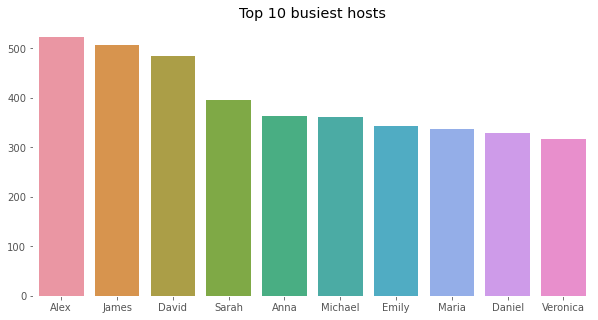

In [134]:
labels = df["host_name"].value_counts()[0:10].index
count = df["host_name"].value_counts()[0:10].values
plt.figure(figsize=(10,5))
ax = sns.barplot(x = labels,y = count,labels=)
ax.set_facecolor("White")
plt.title("Top 10 busiest hosts")

In [88]:
top10_expensive_loc = pd.DataFrame(df.groupby(["neighbourhood"])["price"].median()).sort_values(by=["price"],ascending=False).head(10)

In [89]:
top10_cheapest_loc = pd.DataFrame(df.groupby(["neighbourhood"])["price"].median()).sort_values(by=["price"],ascending=True).head(10)

Text(0.5, 1.0, 'Top 10 locations with highest prices')

<Figure size 864x504 with 0 Axes>

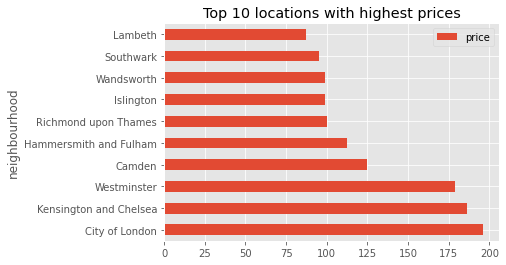

In [90]:
plt.figure(figsize=(12,7))
top10_expensive_loc.plot(kind="barh")
plt.title("Top 10 locations with highest prices")

Text(0.5, 1.0, 'Top 10 locations with lowest prices')

<Figure size 864x504 with 0 Axes>

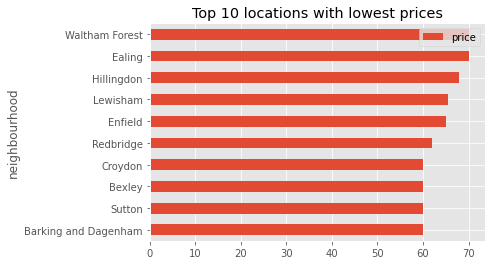

In [108]:
plt.figure(figsize=(12,7))
top10_cheapest_loc.plot(kind="barh")
plt.title("Top 10 locations with lowest prices")

Text(0.5, 1.0, 'Top 10 highest traffic BY location')

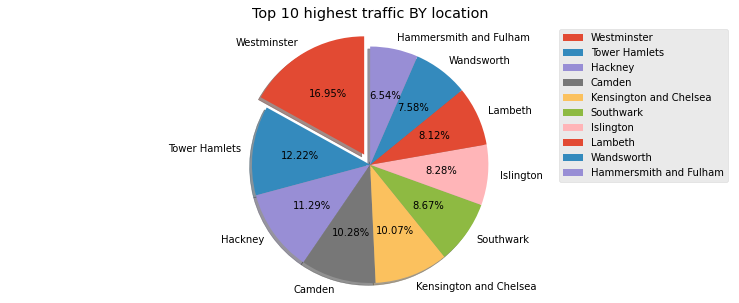

In [58]:
values = df.neighbourhood.value_counts()[0:10].values
labels = df.neighbourhood.value_counts()[0:10].index
explode = [0.1,0,0,0,0,0,0,0,0,0]
plt.figure(figsize=(13,5))
plt.pie(values,labels=labels,shadow=True,autopct="%.2f%%",explode=explode,startangle=90,radius=1)
plt.axis("equal")
plt.legend()
plt.title("Top 10 highest traffic BY location")

#### From the above graph, we can understand that westminister has highest traffic, while tower hamlets,hackney to be the places with next highest traffic.

Text(0.5, 1.0, 'price distribution in westminster')

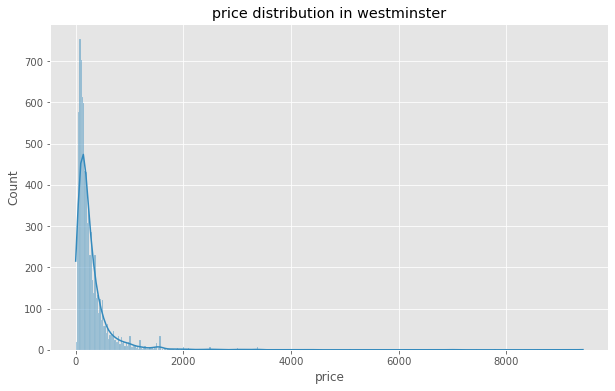

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["neighbourhood"]=="Westminster"]["price"],kde=True)
plt.title("price distribution in westminster")

In [150]:
print("50 percentile : ",np.quantile(df[df["neighbourhood"]=="Westminster"]["price"],0.50))
print("75 percentile : ",np.quantile(df[df["neighbourhood"]=="Westminster"]["price"],0.75))
print("95 percentile : ",np.quantile(df[df["neighbourhood"]=="Westminster"]["price"],0.95))

50 percentile :  179.0
75 percentile :  330.0
95 percentile :  875.0


### Westminster Hosts Pricing
#### 50% of the hosts charging <=179.
#### 75% of the hosts charing <= 330
#### 95% of the  host charging <=875 and only 5% of host charging more.

In [177]:
westminster_morethan_875 = df[(df["neighbourhood"]=="Westminster") & (df["price"]>875)]
df.groupby(["room_type"])["price"].median()

room_type
Entire home/apt    149.0
Hotel room         202.0
Private room        50.0
Shared room         39.0
Name: price, dtype: float64

In [170]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


Text(0.5, 1.0, 'Top 10 lowest traffic BY location')

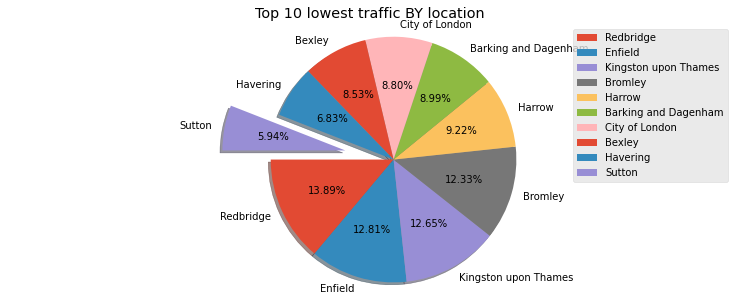

In [62]:
values = df.neighbourhood.value_counts().tail(10).values
labels = df.neighbourhood.value_counts().tail(10).index
explode = [0,0,0,0,0,0,0,0,0,0.4]
plt.figure(figsize=(13,5))
plt.pie(values,labels=labels,shadow=True,autopct="%.2f%%",explode=explode,startangle=180,radius=1)
plt.axis("equal")
plt.legend()
plt.title("Top 10 lowest traffic BY location")

#### From the above graph, Sutton is place with the lowest traffic place.

In [199]:
from datetime import datetime
df["last_review"] = pd.to_datetime(df["last_review"])

In [209]:
df["last_review_year"] = pd.DatetimeIndex(df["last_review"]).year
df["last_review_month"] = pd.DatetimeIndex(df["last_review"]).month
df["last_review_day"] = pd.DatetimeIndex(df["last_review"]).day

<AxesSubplot:>

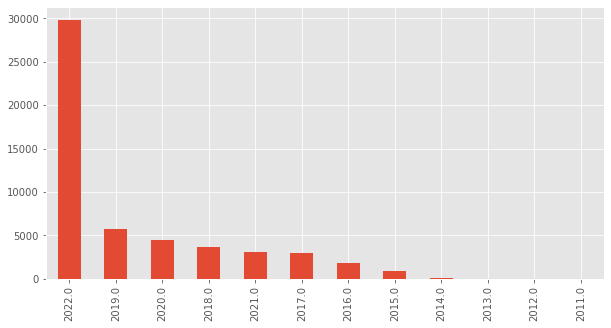

In [226]:
plt.figure(figsize=(10,5))
df["last_review_year"].value_counts().plot(kind="bar")
plt.title("")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


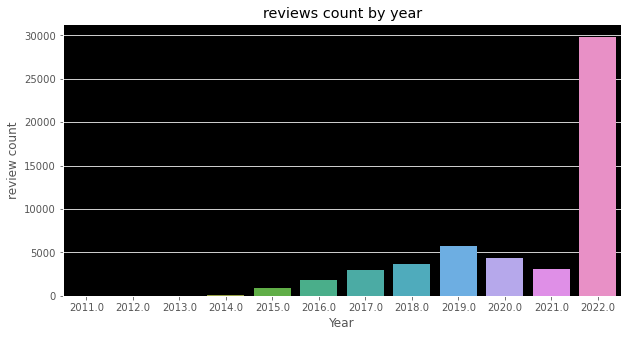

In [246]:
years = df["last_review_year"].value_counts().reset_index().sort_values(by="index",ascending=True)["index"]
review_count = df["last_review_year"].value_counts().reset_index().sort_values(by="index",ascending=True)["last_review_year"]
plt.figure(figsize=(10,5))
ax = sns.barplot(years,review_count)
plt.title("reviews count by year")
plt.xlabel("Year")
plt.ylabel("review count")
ax.set_facecolor("Black")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'November'),
  Text(1, 0, 'February'),
  Text(2, 0, 'April'),
  Text(3, 0, 'October'),
  Text(4, 0, 'December'),
  Text(5, 0, 'May'),
  Text(6, 0, 'March'),
  Text(7, 0, 'January'),
  Text(8, 0, 'June'),
  Text(9, 0, 'September'),
  Text(10, 0, 'July'),
  Text(11, 0, 'August')])

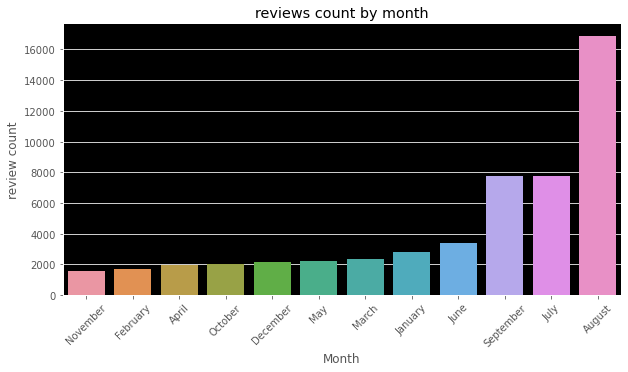

In [253]:
month = df["last_review_month"].value_counts().reset_index().sort_values(by="last_review_month",ascending=True)["index"]
review_count_month = df["last_review_month"].value_counts().reset_index().sort_values(by="index",ascending=True)["last_review_month"]
plt.figure(figsize=(10,5))
ax = sns.barplot(month,review_count_month)
plt.title("reviews count by month")
plt.xlabel("Month")
plt.ylabel("review count")
ax.set_facecolor("Black")
plt.xticks(rotation=45)

In [250]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,last_review_year,last_review_month,last_review_day
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,...,65,2016-06-10,0.47,1,74,0,NaN,2016.0,June,10.0
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,...,30,2022-07-15,0.20,2,343,9,NaN,2022.0,July,15.0
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,...,42,2022-01-04,0.34,1,222,1,NaN,2022.0,January,4.0
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,...,493,2022-09-02,3.59,5,236,20,NaN,2022.0,September,2.0
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,...,6,2022-07-04,0.05,1,180,2,NaN,2022.0,July,4.0


<AxesSubplot:xlabel='availability_365', ylabel='Count'>

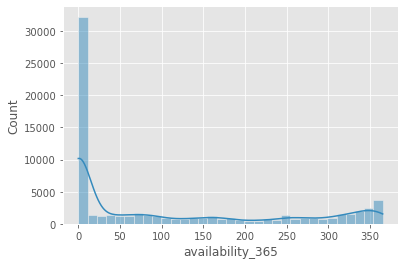

In [214]:
sns.histplot(df["availability_365"],kde=True)

In [103]:
from scipy.stats import shapiro

In [110]:
stats,p = shapiro(df["availability_365"])
print("%.30f" % (p))
if p>0.05:
    print("Normal Dist")
else:
    print("Not Normal dist")

0.000000000000000000000000000000
Not Normal dist
